In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


1. IMPORT DATASET

In [34]:
#a/ Load the data set
df = pd.read_excel("Data_AIL.xlsx")
df.head()

,e,no. video,Student ID,Full name,id,standardized dish,dish occurence (based on transcript),dish imply,start time,end time,...,sauce (based on transcript),venue,container,describe how to make it,viewer feeling of youtuber's style,viewer feeling of presented food,YouTuber feeling,location,foreigner,Unnamed: 24
0,1.0,51.0,NaN,NaN,5OzrpNCyXqs,snail vermicelli soup,bun oc,NaN,1:05,3:21,...,NaN,street restaurant,bowl,1.0,4.0,NaN,5.0,HN,1.0,NaN
1,2.0,51.0,NaN,NaN,5OzrpNCyXqs,vermicelli with fried tofu and shrimp paste,bun dau mam tom,NaN,3:32,6:10,...,"fish sauce, fermented shrimp paste, pepper, ch...",street restaurant,tray,1.0,4.0,NaN,4.0,HN,1.0,NaN
2,3.0,51.0,NaN,NaN,5OzrpNCyXqs,fried spring roll,spring roll,NaN,5:23,6:10,...,"fish sauce, sweet spicy garlic sauce",street restaurant,plate,0.0,5.0,NaN,5.0,HN,1.0,NaN
3,4.0,51.0,NaN,NaN,5OzrpNCyXqs,steamed rolled rice pancake,banh cuon,NaN,6:22,9:23,...,"garlic water, fried caramelized scallion, pepp...",street restaurant,plate,1.0,5.0,NaN,5.0,HN,1.0,NaN
4,5.0,51.0,NaN,NaN,5OzrpNCyXqs,shrimp cake,shrimp cake,NaN,9:42,11:55,...,"chili, sweet spicy sauce",street restaurant,plate,1.0,4.0,NaN,5.0,HN,1.0,NaN


In [35]:
print(df.shape)

(3850, 25)


In [36]:
#b/ Select features
data = df[["start time","end time","Unnamed: 11","viewer feeling of youtuber's style "]]

In [37]:
data.head()

,start time,end time,Unnamed: 11,viewer feeling of youtuber's style
0,1:05,3:21,9,4.0
1,3:32,6:10,11,4.0
2,5:23,6:10,4,5.0
3,6:22,9:23,5,5.0
4,9:42,11:55,4,4.0


In [38]:
data= data.dropna(axis= 0)
data.describe()

,Unnamed: 11
count,3771.000000
mean,3.279236
std,2.804457
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,20.000000


In [39]:
# convert start time and end time to seconds
import re
def __check_value_time(hours=0, minutes=0, seconds=0):
    # print('Time out: 'hours, minutes, seconds)
    if hours > 24:
        print('Time error: ',hours, minutes, seconds)
        raise ValueError('Hour is out of range')

    if seconds > 60:
        print('Time error: ',hours, minutes, seconds)
        raise ValueError('Second is out of range')

    if minutes > 60:
        print('Time error: ',hours, minutes, seconds)
        raise ValueError('Minutes is out of range')

def process_time_str(time_str):
    time_data = re.findall('[0-9]?[0-9]', time_str)
    TIME_WITH_HOUR = 3
    TIME_WITH_MINUTES = 2
    TIME_WITH_SECONDS = 1
    MAX_SECONDS = 90060
    # print(time_data)
    if len(time_data) == TIME_WITH_HOUR:
        hours = int(time_data[0])
        minutes = int(time_data[1])
        seconds = int(time_data[2])

        __check_value_time(hours, seconds, minutes)

        return (hours*3600 + minutes*60 + seconds)
    if len(time_data) == TIME_WITH_MINUTES:
        minutes = int(time_data[0])
        seconds = int(time_data[1])

        __check_value_time(minutes=minutes, seconds=seconds)

        return (minutes*60 + seconds)
    if len(time_data) == TIME_WITH_SECONDS:
        seconds = int(time_data[0])

        __check_value_time(seconds=seconds)

        return seconds

In [40]:
index_data = list()
for str_time in data['start time']:
    if str_time[0].isdigit() and str_time[-1].isdigit():
        index_data.append(True)
    else:
        index_data.append(False)

data = data[index_data]

index_data = list()
for str_time in data['end time']:
    if str_time[0].isdigit() and str_time[-1].isdigit():
        index_data.append(True)
    else:
        index_data.append(False)
data = data[index_data]
df_time = list()

for start_time, end_time in zip(data['start time'], data['end time']):
    df_time.append((process_time_str(start_time), process_time_str(end_time)))

data[['start time', 'end time']] = df_time
data["viewer feeling of youtuber's style "] = data["viewer feeling of youtuber's style "].astype('int')


In [41]:
data['duration'] = data['end time']- data['start time']

In [42]:
data= data.loc[data['duration']>=0]
data = data.loc[data["viewer feeling of youtuber's style "]!=0]
data.head()

,start time,end time,Unnamed: 11,viewer feeling of youtuber's style,duration
0,65,201,9,4,136
1,212,370,11,4,158
2,323,370,4,5,47
3,382,563,5,5,181
4,582,715,4,4,133


In [43]:
# Normalization
data['duration'] = data['duration']/data['duration'].max()
data['Unnamed: 11'] = data['Unnamed: 11']/data['Unnamed: 11'].max()

# Phân loại 
input_data = data[['duration', 'Unnamed: 11']]
output_data = data["viewer feeling of youtuber's style "]/5

In [44]:
#convert to numpy
x=input_data.to_numpy()
y=output_data.to_numpy()
print(x,y)


[[0.08182912 0.45      ]
 [0.09506619 0.55      ]
 [0.02827918 0.2       ]
 ...
 [0.1143201  0.15      ]
 [0.1967509  0.2       ]
 [0.29602888 0.2       ]] [0.8 0.8 1.  ... 0.8 0.8 0.6]


In [45]:

#c/ Split it into two parts: 70% of which you will use to train your model and the remaining data will be used to test the model.

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state=0)

In [46]:
print(x_train.shape)
print(x_test.shape)

(2590, 2)
(1111, 2)


2. Summarize and Visualize the dataset.

In [47]:
#a/ Explore the dimensions of data
#
feature = pd.DataFrame({"Viewer's feeling": y,"duration":x[:,0],"Number of ingredient":x[:,1]})
print("Data shape: ",feature.shape)

Data shape:  (3701, 3)


In [48]:
#b/ Show some instances from the data
#
feature.head(5)

,Viewer's feeling,duration,Number of ingredient
0,0.8,0.081829,0.45
1,0.8,0.095066,0.55
2,1.0,0.028279,0.20
3,1.0,0.108905,0.25
4,0.8,0.080024,0.20


In [49]:
#c/ Do Statistical summary of all attributes
#
feature.info()
feature.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Viewer's feeling      3701 non-null   float64
 1   duration              3701 non-null   float64
 2   Number of ingredient  3701 non-null   float64
dtypes: float64(3)
memory usage: 86.9 KB


,Viewer's feeling,duration,Number of ingredient
count,3701.000000,3701.000000,3701.000000
mean,0.749311,0.055872,0.164604
std,0.184604,0.066751,0.140850
min,0.200000,0.000000,0.000000
25%,0.600000,0.015644,0.050000
50%,0.800000,0.036101,0.150000
75%,0.800000,0.070999,0.250000
max,1.000000,1.000000,1.000000


Text(0, 0.5, "Viewer's feeling")

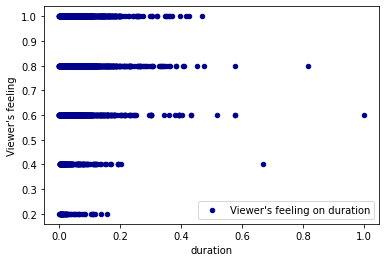

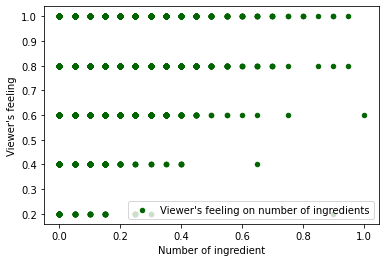

In [50]:
#ploting data
#bivarate
ax1 = feature.plot.scatter(x="duration", y="Viewer's feeling", color="DarkBlue", label="Viewer's feeling on duration")
ax1.set_xlabel("duration")
ax1.set_ylabel("Viewer's feeling")
ax2 = feature.plot.scatter(x="Number of ingredient", y="Viewer's feeling", color="DarkGreen", label="Viewer's feeling on number of ingredients")
ax2.set_xlabel("Number of ingredient")
ax2.set_ylabel("Viewer's feeling")

Text(0.5, 0, "Viewer's feeling")

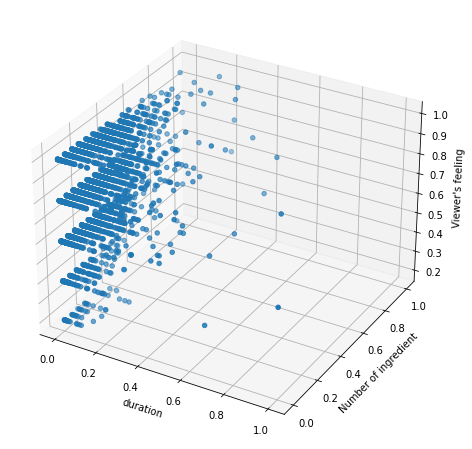

In [51]:
#multivariate
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(xs=feature["duration"], ys=feature["Number of ingredient"],zs=feature["Viewer's feeling"]) #Plot scatter
ax.set_xlabel("duration")
ax.set_ylabel("Number of ingredient")
ax.set_zlabel("Viewer's feeling", rotation = 90)

3. Build linear regression model

In [52]:
#add collumn 1 in x
x_train = np.hstack((np.ones((x_train.shape[0],1)),x_train))
x_test = np.hstack((np.ones((x_test.shape[0],1)),x_test))

In [53]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [54]:

# linear regression using "mini-batch" gradient descent
# function to compute hypothesis / predictions
def hypothesis(X, theta):
    return np.dot(X, theta)
  
# function to compute gradient of error function w.r.t. theta
def gradient(X, y, theta):
    h = hypothesis(X, theta)
    grad = np.dot(X.transpose(), (h - y))
    return grad
  
# function to compute the error for current values of theta
def cost(X, y, theta,m):
    h = hypothesis(X, theta)
    J = np.dot((h - y).transpose(), (h - y))
    J /= (2 * m)
    return J[0][0]
  
# function to create a list containing mini-batches
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
  
    for i in range(n_minibatches):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches


  
# function to perform mini-batch gradient descent
def gradientDescent(X, y, learning_rate = 0.2, batch_size = 500):
    theta = np.zeros((X.shape[1], 1))
    theta_list = []
    cost_list = []
    max_iters = 5
    for itr in range(max_iters):
        mini_batches = create_mini_batches(X, y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            m = np.size(y_mini)
            theta = theta - (learning_rate/m) * gradient(X_mini, y_mini, theta)            
            cost_list.append(cost(X_mini, y_mini, theta,m))
            theta_list.append(theta)       
    return  theta_list,cost_list

In [55]:
theta_list,cost_list = gradientDescent(x_train,y_train)
i =cost_list.index(min(cost_list))
print("Min Cost: ",cost_list[i])
theta = theta_list[i]
print("Coeficient: ",theta)


Min Cost:  0.015028685207187352
Coeficient:  [[0.72536889]
 [0.04736386]
 [0.14469666]]


Text(0, 0.5, 'cost')

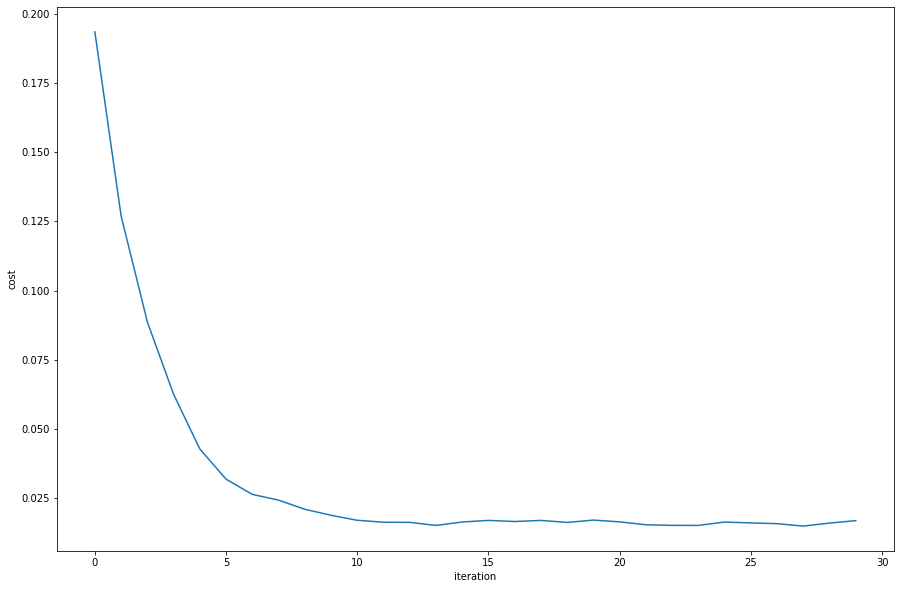

In [56]:
#cost on iteration
plt.figure(figsize=(15,10))
plt.plot(cost_list)
plt.xlabel("iteration")
plt.ylabel("cost")

4. Compare the results and make prediction

In [57]:
def predict_standardize(pred):
    i=0
    for p in pred:
        if(p[0]<1.5):
            pred[i][0] = 1
        if(p[0]>=1.5 and p[0]<2.5):
            pred[i][0] = 2
        if(p[0]>=2.5 and p[0]<3.5):
            pred[i][0] = 3
        if(p[0]>=3.5 and p[0]<4.5):
            pred[i][0] = 4
        if(p[0]>=4.5):
            pred[i][0] = 5
        i +=1
    return pred          
    


In [58]:
y_predict = hypothesis(x_test,theta) * 5
pred =predict_standardize(y_predict)
print(pred)
y_test = y_test * 5



[[4.]
 [4.]
 [4.]
 ...
 [4.]
 [4.]
 [4.]]


In [59]:
print(f'Training Set Accuracy: {(pred == y_test).mean() * 100:f}')

Training Set Accuracy: 38.253825


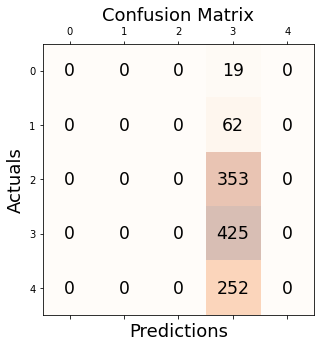

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_predict)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [61]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        19
         2.0       0.00      0.00      0.00        62
         3.0       0.00      0.00      0.00       353
         4.0       0.38      1.00      0.55       425
         5.0       0.00      0.00      0.00       252

    accuracy                           0.38      1111
   macro avg       0.08      0.20      0.11      1111
weighted avg       0.15      0.38      0.21      1111



c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

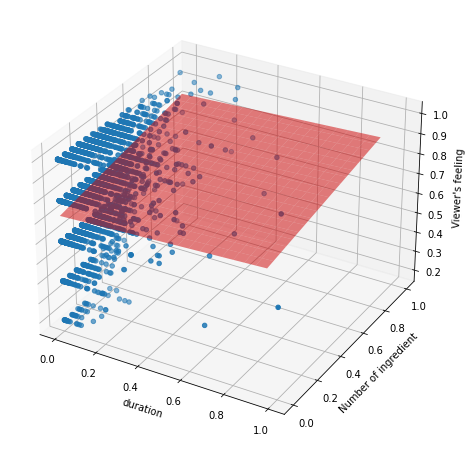

In [62]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(xs=feature["duration"], ys=feature["Number of ingredient"],zs=feature["Viewer's feeling"]) #Plot scatter
ax.set_xlabel("duration")
ax.set_ylabel("Number of ingredient")
ax.set_zlabel("Viewer's feeling", rotation = 90)

xs = np.tile(np.arange(0,1,0.05),(1,1))
ys = np.tile(np.arange(0,1,0.05),(1,1)).T
zs = xs*theta[1]+ys*theta[2]+theta[0]

ax.plot_surface(xs,ys,zs, alpha=0.5, color = 'red')

In [63]:
#compare
result = pd.DataFrame({'Actual Value':y_test.reshape(y_test.shape[0],),'Predicted Value':y_predict.reshape(y_predict.shape[0],),"Difference": (y_test - y_predict).reshape(y_test.shape[0])})
result[0:20]

,Actual Value,Predicted Value,Difference
0,4.0,4.0,0.0
1,3.0,4.0,-1.0
2,4.0,4.0,0.0
3,5.0,4.0,1.0
4,4.0,4.0,0.0
5,5.0,4.0,1.0
6,3.0,4.0,-1.0
7,4.0,4.0,0.0
8,4.0,4.0,0.0
9,2.0,4.0,-2.0
